# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

# Reading Images

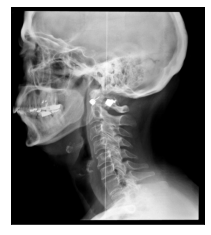

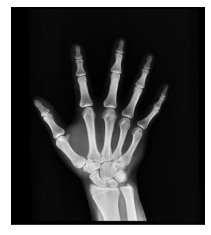

In [2]:
brain = iio.imread('brain_xray.jpg')
hand = iio.imread('hand_xray.jpg')

def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        plt.savefig(name)
    plt.show()
    
show_image(brain)
show_image(hand)

# Combining Images

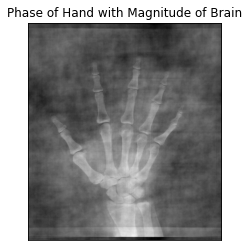

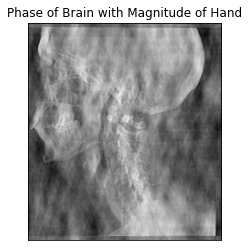

In [3]:
def swap(img1, img2):
    '''
    a function for swaping phase and magnitude of two images
    '''
    
    f1 = np.fft.fftshift(np.fft.fft2(img1))
    f2 = np.fft.fftshift(np.fft.fft2(img2))
    
    fnew1 = np.abs(f1) * np.exp(complex(0,1)*np.angle(f2))
    fnew2 = np.abs(f2) * np.exp(complex(0,1)*np.angle(f1))
    
    new_img1 = np.fft.ifft2(np.fft.ifftshift(fnew1)).real
    new_img2 = np.fft.ifft2(np.fft.ifftshift(fnew2)).real
    
    new_img1 = (new_img1-np.min(new_img1))/(np.max(new_img1)-np.min(new_img1))*255
    new_img2 = (new_img2-np.min(new_img2))/(np.max(new_img2)-np.min(new_img2))*255
    
    return new_img1, new_img2

img1, img2 = swap(brain, hand)

show_image(img1, 'Phase of Hand with Magnitude of Brain', True, 'res6_1.jpg')
show_image(img2, 'Phase of Brain with Magnitude of Hand', True, 'res6_2.jpg')